ASTR 19 Group Project

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Given Data Set
data = [
    (1, "8:07", 6.57),
    (1, "15:37", -0.39),
    (2, "8:55", 5.38),
    (2, "16:25", -1.74),
    (3, "9:45", 5.26),
    (4, "10:35", -1.36),
    (4, "18:00", -1.15),
    (5, "11:28", 3.48),
    (5, "18:46", -1.61),
    (6, "12:22", 2.62),
    (6, "19:31", 0.05),
    (7, "13:24", 1.83),
    (7, "20:16", 1.01),
    (8, "3:22", 3.57),
    (8, "21:01", 0.73),
    (9, "4:07", 4.54),
    (9, "21:46", 2.17),
    (10, "4:50", 3.76),
    (10, "11:58", 2.88),
    (11, "5:31", 3.90),
    (11, "12:56", 1.92),
    (12, "6:08", 4.73),
    (12, "13:45", 1.74),
    (13, "6:47", 5.66),
    (13, "14:25", 0.79),
    (14, "7:22", 5.33),
    (14, "15:00", -0.04),
    (15, "7:59", 5.23),
    (15, "15:34", -1.12),
    (16, "8:34", 6.67),
    (16, "16:08", -0.61),
    (17, "9:10", 4.74),
    (17, "16:41", -0.93),
    (18, "9:45", 4.69),
    (18, "17:12", -1.29),
    (19, "10:21", 4.20),
    (19, "17:45", 0.22),
    (20, "10:57", 3.68),
    (20, "18:15", 0.26),
    (21, "11:38", 2.47),
    (21, "18:48", 0.36),
    (22, "12:25", 2.59),
    (22, "19:20", 0.99),
    (23, "2:22", 4.10),
    (23, "19:52", 1.87),
    (24, "2:58", 3.17),
    (24, "20:30", 1.60),
    (25,  "3:37", 3.71),
    (25, "10:44", 3.10),
    (26, "4:23", 4.04),
    (26, "11:55", 2.49),
    (27, "5:15", 4.07),
    (27, "12:57", 2.18),
    (28, "6:09", 5.93),
    (28, "13:50", 0.70),
    (29, "7:05", 6.89),
    (29, "14:39", 0.21),
    (30, "7:58", 6.72),
    (30, "15:27", 0.22),
    (31, "8:50", 6.77),
    (31, "16:10", -1.68),
    (32, "9:40", 5.77),
    (32, "16:52", -1.32),
    (33, "10:30", 4.35),
    (33, "17:34", -0.73),
    (34, "11:19", 4.23),
    (34, "18:12", -0.38),
    (35, "12:10", 2.24),
    (35, "18:49", -0.61),
    (36, "1:32", 3.45),
    (36, "19:24", -0.46),
    (37, "2:13", 4.13),
    (37, "20:00", 1.21),
    (38, "2:54", 3.34),
    (38, "9:54", 2.58),
    (39, "3:39", 3.32),
    (39, "11:15", 3.26),
    (40, "4:29", 5.21),
    (40, "12:22", 2.39),
    (41, "5:21", 4.83),
    (41, "13:14", 2.41),
]

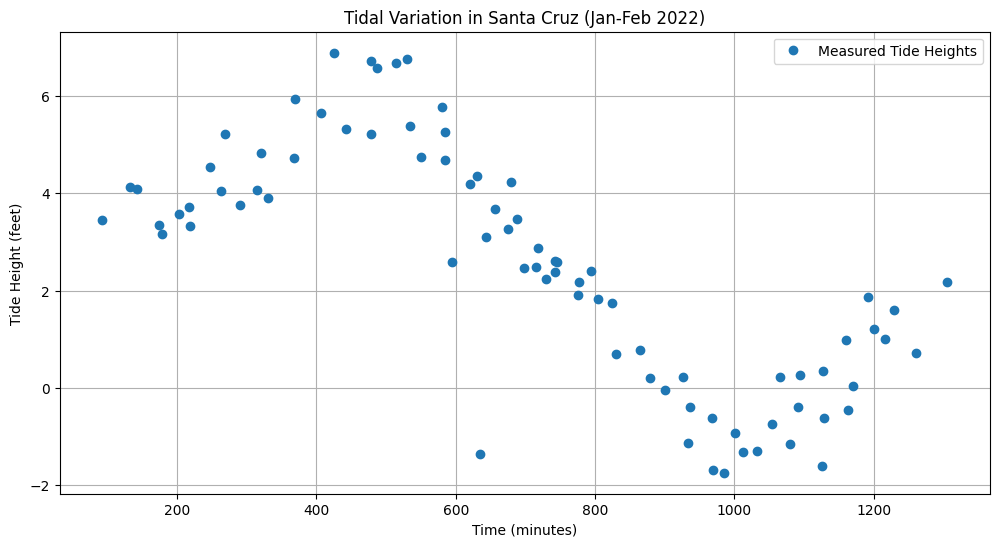

In [34]:
# Convert time strings to minutes
time_in_minutes = []
for _, time_str, _ in data:
    time_parts = time_str.split(':')
    hours = int(time_parts[0])
    minutes = int(time_parts[1])
    seconds = 0
    if len(time_parts) > 2:
        seconds = float(time_parts[2])
    total_minutes = hours * 60 + minutes + round(seconds / 60)
    time_in_minutes.append(total_minutes)

# Extract day and tide height data
days = np.array([day for day, _, _ in data])
tide_heights = np.array([height for _, _, height in data])

# Create a plot of the tide variation
plt.figure(figsize=(12, 6))
plt.plot(x, tide_heights, 'o', label='Measured Tide Heights')
plt.xlabel('Time (minutes)')
plt.ylabel('Tide Height (feet)')
plt.legend()
plt.title('Tidal Variation in Santa Cruz (Jan-Feb 2022)')
plt.grid(True)
plt.show()